# Evaluate structure generation distributions

In [38]:
import os
import pickle

import numpy as np

In [3]:
with open('structure_POP8_150/0/structure.pkl', 'rb') as f:
    tracks = pickle.load(f)

In [4]:
np.mean([len(structure) for structure in tracks])

10.67

In [5]:
from collections import Counter
import matplotlib.pyplot as plt


In [ ]:
# Number of categories
n_categories = len(labels)

# Create an array for the x positions
x = np.arange(n_categories)

# Width of the bars
width = 0.35

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Bars for list1
bars1 = ax.bar(x - width/2, list1, width, label='List 1')

# Bars for list2
bars2 = ax.bar(x + width/2, list2, width, label='List 2')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Categories')
ax.set_ylabel('Frequencies')
ax.set_title('Frequencies by Category and List')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Optional: Add values on top of the bars
ax.bar_label(bars1, padding=3)
ax.bar_label(bars2, padding=3)

# Display the plot
plt.tight_layout()
plt.show()


In [123]:
labels_909

(10, 9, 7, 12, 11, 8)

In [129]:
[counts_gmg[labels_gmg.index(cat)] if cat in labels_gmg else 0 for cat in all_categories]

[0, 0, 0, 0, 0, 0.04, 0.02, 0.15, 0.18, 0.24, 0.37]

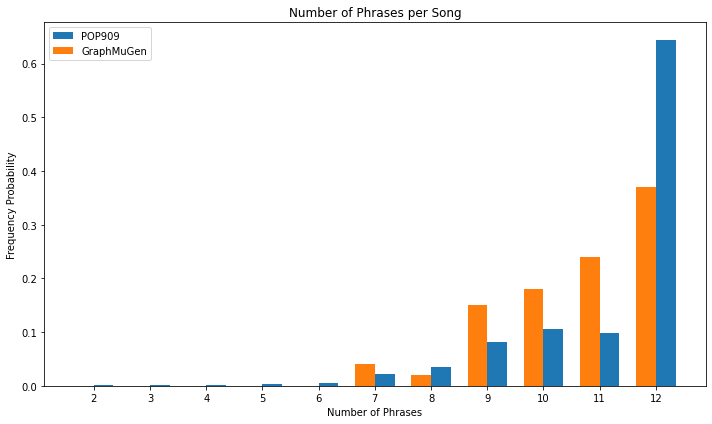

In [136]:
# Count the frequency of each item in the list
frequency = Counter([len(structure) for structure in tracks])
# Get the items and their corresponding frequencies
labels_gmg, counts = zip(*frequency.items())
total = len(tracks)
counts_gmg = [count/total for count in counts]

# Count the frequency of each item in the list
frequency_909 = Counter([len(structure) for structure in all_phrases])
# Get the items and their corresponding frequencies
labels_909, counts = zip(*frequency_909.items())
total = len(all_phrases)
counts_909 = [count/total for count in counts]

# Number of categories
all_categories = sorted(set(labels_gmg) | set(labels_909))

n_categories = len(all_categories)
aligned_count_gmg = [counts_gmg[labels_gmg.index(cat)] if cat in labels_gmg else 0 for cat in all_categories]
aligned_count_909 = [counts_909[labels_909.index(cat)] if cat in labels_909 else 0 for cat in all_categories]


# Create an array for the x positions
x = np.arange(n_categories)
# Width of the bars
width = 0.35

# Create a plot
fig, ax = plt.subplots(figsize=(10, 6))

# Bars for list2
bars2 = ax.bar(x + width/2, aligned_count_909, width, label='POP909')
# Bars for list1
bars1 = ax.bar(x - width/2, aligned_count_gmg, width, label='GraphMuGen')


# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Number of Phrases')
ax.set_ylabel('Frequency Probability')
# ax.set_title('Frequencies by Category and List')
ax.set_title('Number of Phrases per Song')

ax.set_xticks(x)
ax.set_xticklabels(all_categories)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


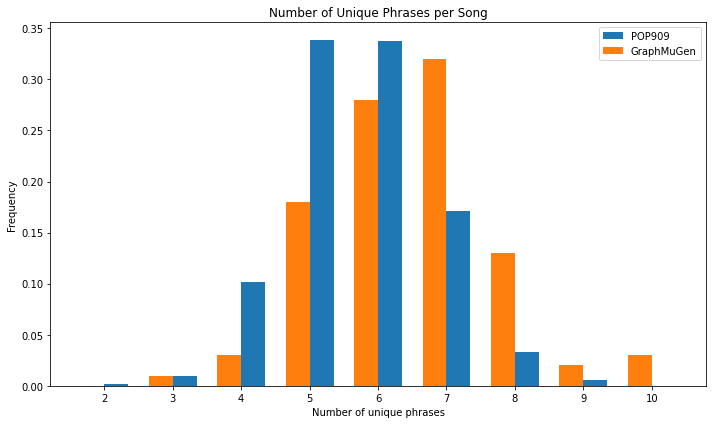

In [138]:
# Count the frequency of each item in the list
frequency = Counter([len({frozenset(d.items()) for d in structure}) for structure in tracks])
# Get the items and their corresponding frequencies
labels_gmg, counts = zip(*frequency.items())
total = len(tracks)
counts_gmg = [count/total for count in counts]

# Count the frequency of each item in the list
frequency_909 = Counter([len(set(structure)) for structure in all_phrases])
# Get the items and their corresponding frequencies
labels_909, counts = zip(*frequency_909.items())
total = len(all_phrases)
counts_909 = [count/total for count in counts]

# Number of categories
all_categories = sorted(set(labels_gmg) | set(labels_909))

n_categories = len(all_categories)
aligned_count_gmg = [counts_gmg[labels_gmg.index(cat)] if cat in labels_gmg else 0 for cat in all_categories]
aligned_count_909 = [counts_909[labels_909.index(cat)] if cat in labels_909 else 0 for cat in all_categories]


# Create an array for the x positions
x = np.arange(n_categories)
# Width of the bars
width = 0.35

# Create a plot
fig, ax = plt.subplots(figsize=(10, 6))

# Bars for list2
bars2 = ax.bar(x + width/2, aligned_count_909, width, label='POP909')
# Bars for list1
bars1 = ax.bar(x - width/2, aligned_count_gmg, width, label='GraphMuGen')


# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Number of unique phrases')
ax.set_ylabel('Frequency')
# ax.set_title('Frequencies by Category and List')
ax.set_title('Number of Unique Phrases per Song')

ax.set_xticks(x)
ax.set_xticklabels(all_categories)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


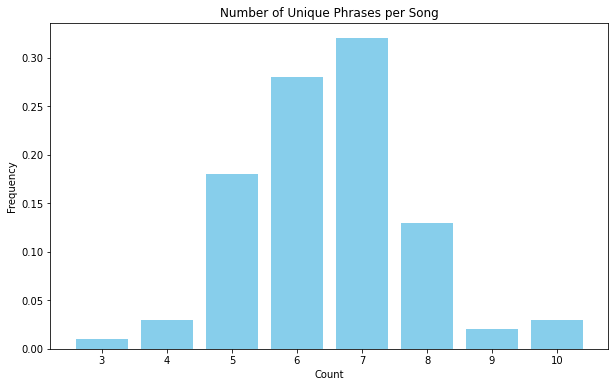

In [81]:
# def plot_frequency_graph(items):
# Count the frequency of each item in the list
frequency = Counter([len({frozenset(d.items()) for d in structure}) for structure in tracks])

# Get the items and their corresponding frequencies
labels, counts = zip(*frequency.items())
total = len(tracks)
counts = [count/total for count in counts]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue')

# Add title and labels
plt.title('Number of Unique Phrases per Song')
plt.xlabel('Count')
plt.ylabel('Frequency')

# Rotate x-axis labels for better readability (optional)
# plt.xticks(rotation=45)

# Show the plot
plt.show()

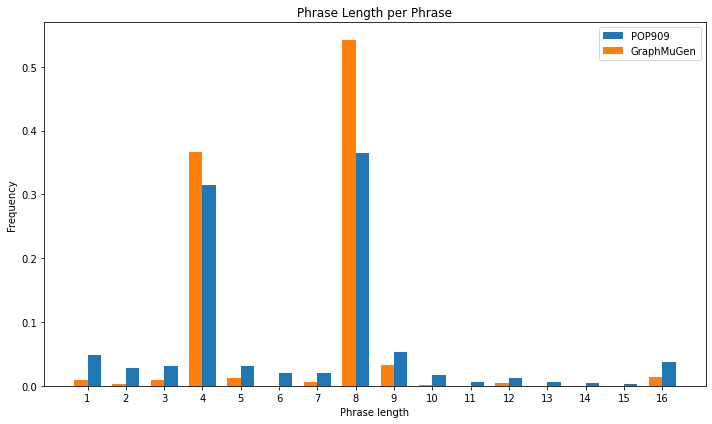

In [141]:
# Count the frequency of each item in the list
frequency = Counter([phrase['length'] for structure in tracks for phrase in structure])
# Get the items and their corresponding frequencies
labels_gmg, counts = zip(*frequency.items())
total = len([phrase for structure in tracks for phrase in structure])
counts_gmg = [count/total for count in counts]

# Count the frequency of each item in the list
frequency_909 = Counter([int(phrase[1:]) for structure in all_phrases for phrase in structure if int(phrase[1:])<=16])
# Get the items and their corresponding frequencies
labels_909, counts = zip(*frequency_909.items())
total = len([phrase for structure in all_phrases for phrase in structure])
counts_909 = [count/total for count in counts]

# Number of categories
all_categories = sorted(set(labels_gmg) | set(labels_909))

n_categories = len(all_categories)
aligned_count_gmg = [counts_gmg[labels_gmg.index(cat)] if cat in labels_gmg else 0 for cat in all_categories]
aligned_count_909 = [counts_909[labels_909.index(cat)] if cat in labels_909 else 0 for cat in all_categories]


# Create an array for the x positions
x = np.arange(n_categories)
# Width of the bars
width = 0.35

# Create a plot
fig, ax = plt.subplots(figsize=(10, 6))

# Bars for list2
bars2 = ax.bar(x + width/2, aligned_count_909, width, label='POP909')
# Bars for list1
bars1 = ax.bar(x - width/2, aligned_count_gmg, width, label='GraphMuGen')


# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Phrase length')
ax.set_ylabel('Frequency')
ax.set_title('Phrase Length per Phrase')

ax.set_xticks(x)
ax.set_xticklabels(all_categories)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


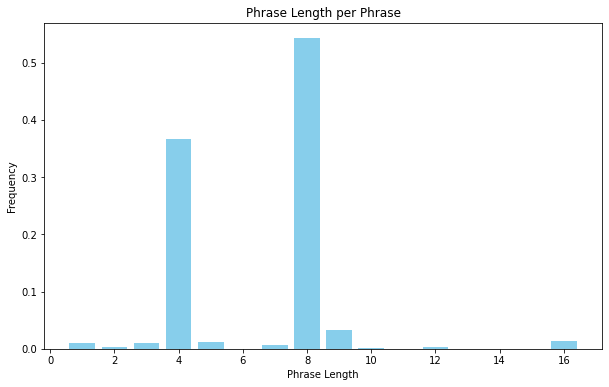

In [82]:
# def plot_frequency_graph(items):
# Count the frequency of each item in the list
frequency = Counter([phrase['length'] for structure in tracks for phrase in structure])

# Get the items and their corresponding frequencies
labels, counts = zip(*frequency.items())
total = len([phrase for structure in tracks for phrase in structure])
counts = [count/total for count in counts]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue')

# Add title and labels
plt.title('Phrase Length per Phrase')
plt.xlabel('Phrase Length')
plt.ylabel('Frequency')

# Rotate x-axis labels for better readability (optional)
# plt.xticks(rotation=45)

# Show the plot
plt.show()

/home/jovyan/GraphMusicGen/envs/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator


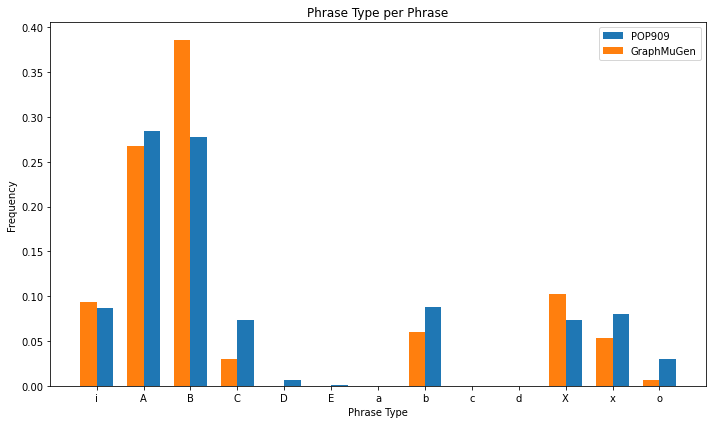

In [149]:
# Count the frequency of each item in the list
frequency = Counter([phrase['phrase_id'] for structure in tracks for phrase in structure])
# Get the items and their corresponding frequencies
labels_gmg, counts = zip(*frequency.items())
total = len([phrase for structure in tracks for phrase in structure])
counts_gmg = [count/total for count in counts]

# Count the frequency of each item in the list
frequency_909 = Counter([id_tokens[phrase[0]] for structure in all_phrases for phrase in structure])
# Get the items and their corresponding frequencies
labels_909, counts = zip(*frequency_909.items())
total = len([phrase for structure in all_phrases for phrase in structure])
counts_909 = [count/total for count in counts]

# Number of categories
# all_categories = sorted(set(labels_gmg) | set(labels_909))
all_categories = id_tokens.values()
n_categories = len(all_categories)
aligned_count_gmg = [counts_gmg[labels_gmg.index(cat)] if cat in labels_gmg else 0 for cat in all_categories]
aligned_count_909 = [counts_909[labels_909.index(cat)] if cat in labels_909 else 0 for cat in all_categories]


# Create an array for the x positions
x = np.arange(n_categories)
# Width of the bars
width = 0.35

# Create a plot
fig, ax = plt.subplots(figsize=(10, 6))

# Bars for list2
bars2 = ax.bar(x + width/2, aligned_count_909, width, label='POP909')

# Bars for list1
bars1 = ax.bar(x - width/2, aligned_count_gmg, width, label='GraphMuGen')


# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Phrase Type')
ax.set_ylabel('Frequency')
ax.set_title('Phrase Type per Phrase')

# ax.set_xticks(x)
# ax.set_xticklabels(all_categories)

ax.set_xticklabels(id_tokens.keys())
ax.set_xticks([x for x in range(0,13)])

ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [23]:
from constants import id_tokens

/home/jovyan/GraphMusicGen/envs/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator


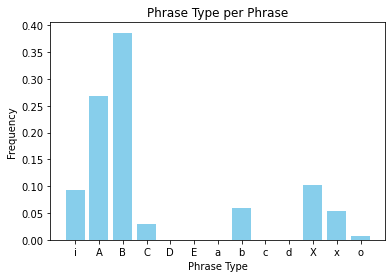

In [83]:
# def plot_frequency_graph(items):
# Count the frequency of each item in the list
frequency = Counter([phrase['phrase_id'] for structure in tracks for phrase in structure])

# Get the items and their corresponding frequencies
labels, counts = zip(*frequency.items())
total = len([phrase for structure in tracks for phrase in structure])
counts = [count/total for count in counts]

# Create a bar chart
fig, ax = plt.subplots(1,1) 
plt.bar(labels, counts, color='skyblue')

# Add title and labels
plt.title('Phrase Type per Phrase')
plt.xlabel('Phrase Type')
plt.ylabel('Frequency')

# Rotate x-axis labels for better readability (optional)
# plt.xticks(rotation=45)
ax.set_xticklabels(id_tokens.keys())
ax.set_xticks([x for x in range(0,13)])

# Show the plot
plt.show()

# Evaluate POP909 original structure

In [42]:
from preprocess_structure import split_string

In [39]:
structure_path = "POP909_structure"


In [93]:
labels = []
label_paths = ["human_label1"]
for folder in os.listdir(structure_path):
    for label_path in label_paths:
        try:
            f = open(f"{structure_path}/{folder}/{label_path}.txt", "r")
            # print(f.read())
            labels.append(f.read())
        except:
            continue

In [94]:
all_phrases = []
for label in labels:
    all_phrases.append(split_string(label)[:12])

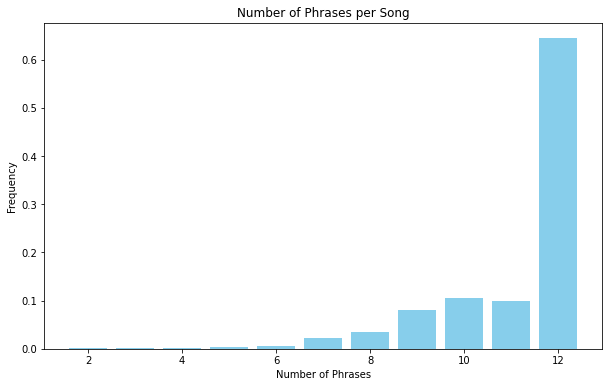

In [95]:
# Count the frequency of each item in the list
frequency = Counter([len(structure) for structure in all_phrases])

# Get the items and their corresponding frequencies
labels, counts = zip(*frequency.items())
total = len(all_phrases)
counts = [count/total for count in counts]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue')

# Add title and labels
plt.title('Number of Phrases per Song')
plt.xlabel('Number of Phrases')
plt.ylabel('Frequency')

# Rotate x-axis labels for better readability (optional)
# plt.xticks(rotation=45)

# Show the plot
plt.show()

In [96]:
set(all_phrases[0])

{'A8', 'B8', 'C4', 'b4', 'i8', 'x2'}

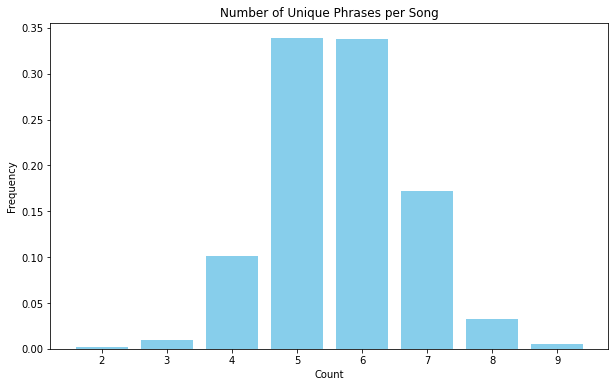

In [97]:
# def plot_frequency_graph(items):
# Count the frequency of each item in the list
# frequency = Counter([len({frozenset(d.items()) for d in structure}) for structure in all_phrases])
frequency = Counter([len(set(structure)) for structure in all_phrases])


# Get the items and their corresponding frequencies
labels, counts = zip(*frequency.items())
total = len(all_phrases)
counts = [count/total for count in counts]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue')

# Add title and labels
plt.title('Number of Unique Phrases per Song')
plt.xlabel('Count')
plt.ylabel('Frequency')

# Rotate x-axis labels for better readability (optional)
# plt.xticks(rotation=45)

# Show the plot
plt.show()

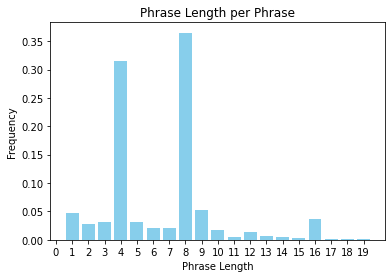

In [98]:
# phrase[1:]

# def plot_frequency_graph(items):
# Count the frequency of each item in the list
frequency = Counter([int(phrase[1:]) for structure in all_phrases for phrase in structure if int(phrase[1:])<=19])

# Get the items and their corresponding frequencies
labels, counts = zip(*frequency.items())
total = len([phrase for structure in all_phrases for phrase in structure])
counts = [count/total for count in counts]

# Create a bar chart
# plt.figure(figsize=(10, 6))
fig, ax = plt.subplots(1,1) 

plt.bar(labels, counts, color='skyblue')

# Add title and labels
plt.title('Phrase Length per Phrase')
plt.xlabel('Phrase Length')
plt.ylabel('Frequency')

# Rotate x-axis labels for better readability (optional)
# plt.xticks(rotation=45)
# ax.set_xticklabels(id_tokens.keys())
ax.set_xticks([x for x in range(0,20)])

# Show the plot
plt.show()

In [99]:
id_tokens

{'i': 0,
 'A': 1,
 'B': 2,
 'C': 3,
 'D': 4,
 'E': 5,
 'a': 6,
 'b': 7,
 'c': 8,
 'd': 9,
 'X': 10,
 'x': 11,
 'o': 12}

/home/jovyan/GraphMusicGen/envs/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator


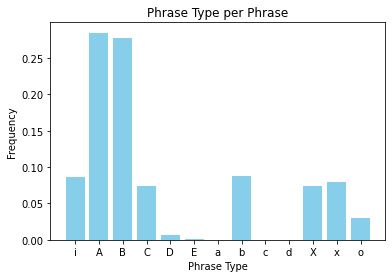

In [100]:
# Count the frequency of each item in the list
# frequency = Counter([phrase['phrase_id'] for structure in tracks for phrase in structure])
frequency = Counter([id_tokens[phrase[0]] for structure in all_phrases for phrase in structure])


# Get the items and their corresponding frequencies
labels, counts = zip(*frequency.items())
total = len([phrase for structure in all_phrases for phrase in structure])
counts = [count/total for count in counts]

# Create a bar chart
fig, ax = plt.subplots(1,1) 
plt.bar(labels, counts, color='skyblue')

# Add title and labels
plt.title('Phrase Type per Phrase')
plt.xlabel('Phrase Type')
plt.ylabel('Frequency')

# Rotate x-axis labels for better readability (optional)
# plt.xticks(rotation=45)
ax.set_xticklabels(id_tokens.keys())
ax.set_xticks([x for x in range(0,13)])

# Show the plot
plt.show()